# Applied Data Wrangling - Exploring Your First Data File

We will read in a CSV (Comma Separated Values) file, learn information about the data in the file, summarize the data, replace messy values, convert data types from text to numeric, and do simple plotting. This gives us a chance to start using [Pandas](https://pandas.pydata.org/) - a tool that we will use frequently in this lab to work with data.

Be sure to run all code this notebook as you go and read all the content.

-----
## Import pandas   

First, we want to include pandas in our script:

In [1]:
# Tell the Python interpreter to include the pandas package and store it in the variable "pd"
import pandas as pd

Now, pandas is ready to be used in this notebook. The [pandas website](https://pandas.pydata.org/) describes the project's goal - pandas "aims to be the fundamental high-level building block for doing practical, real world data analysis in Python. Additionally, it has the broader goal of becoming the most powerful and flexible open source data analysis / manipulation tool available in any language."

Pandas operates in memory, meaning that it is very fast but also limited to the amount of data you can work with by your machine's RAM. There are other packages we can use for gigantic datasets, but Pandas will work for most of what we do.

-----
## Data Frames   

PANDAS uses two kinds of structures to store data - *data frames* and *series*. Data frames are like an Excel spreadsheet - think of a table of data with headings and values. Series are like a single column in an Excel spreadsheet. Both types of data have an *index* - you can think of an index, for now, as a line number.

![Data Frames](https://pandas.pydata.org/docs/_images/01_table_dataframe.svg)

(Image Source: Pandas Tutorial, https://pandas.pydata.org/docs/getting_started/intro_tutorials/01_table_oriented.html)

Pandas makes it very easy to load an Excel file into data frames. Generally, we use CSV (Comma Separated Values) files instead of Excel for common data exchanges. This is a common data format that uses a comma between the value in each column of data ("comma delimited") and it usually puts quotation marks around any data that inherently has commas.

For example, a raw CSV file with a header row might look like this:

<pre>
Book Title,Publisher,Price
War and Peace,Vintage Classics,12.99
"Our Bodies, Ourselves",Touchstone,48.38
Putin's Playbook,"Simon & Schuster, Inc.",14.49
</pre>

Notice that the second book listed has a comma in the title, so it is surrounded by quotation marks to avoid our interpreting the comma as a new column.

The third book listed has a comma in the publisher name, so the quotation marks are used.

Commas appear regularly in text data, requiring quotation marks that add a lot of bloat to many CSV files. This is why some formats use "delimiters" other than commas. A common delimiter you may encounter is the pipe (`|`) (usually above the backslash on your keyboard). A pipe-delimited file would look like this:

<pre>
Book Title|Publisher|Price
War and Peace|Vintage Classics|12.99
Our Bodies, Ourselves|Touchstone|48.38
Putin's Playbook|Simon & Schuster, Inc.|14.49
</pre>

Here's an example of using pandas to load college football bowl data. It will load a file that is CSV format (and its filename ends with .csv) into a data frame.

In [3]:
# load a CSV file (this one is remotely located on a server)
# note - the data dictionary is in https://raw.githubusercontent.com/jcrumpton/DSCI_6113_Data/main/collegefootballbowl.txt
bowlData = pd.read_csv ('https://raw.githubusercontent.com/jcrumpton/DSCI_6113_Data/main/collegefootballbowl.csv')

# what is bowlData?
print(type(bowlData))
print()

# using Python's built-in print method for pandas gives you text tables
print(bowlData)

<class 'pandas.core.frame.DataFrame'>

        id  year        date  day         winner_tie winner_rank  \
0        1  2021  12/29/2021  Wed           Oklahoma          14   
1        2  2020  12/29/2020  Tue              Texas          20   
2        3  2019  12/31/2019  Tue              Texas         NaN   
3        4  2018  12/28/2018  Fri   Washington State          12   
4        5  2017  12/28/2017  Thu    Texas Christian          13   
...    ...   ...         ...  ...                ...         ...   
1522  1523  2004  12/30/2004  Thu  Northern Illinois         NaN   
1523  1524  2003  12/30/2003  Tue       Fresno State         NaN   
1524  1525  2002  12/31/2002  Tue       Fresno State         NaN   
1525  1526  2001  12/31/2001  Mon     Michigan State         NaN   
1526  1527  2000  12/31/2000  Sun          Air Force         NaN   

      winner_points     loser_tie loser_rank  loser_points  attendance  \
0                47        Oregon         15            32     59121.0

Notice that the `.read_csv()` method of pandas does a great job of automatically reading in and treating the CSV file as tabular data. 

The `.print_csv()` method of pandas shows the first five and last five rows of the data frame object that was created to store the CSV data. This CSV file has many columns (14) and the default print functionality here shows the table's first 5 and last 5 lines. The `print` function breaks each line in an effort to make the lines readable.  

One great thing about Pandas is that it can also read .zip files, so if you have a large .csv file, you can store it on your computer or in the cloud in zipped format. A zipped file is quicker to upload, download, and takes up less space - very important if you are paying for storage instances by the second in a cloud situation.

You can look at the first few rows using the `head` method.

In [5]:
# .head(<n rows>) shows the first n rows - it will look prettier than default print()
bowlData.head(10)

,id,year,date,day,winner_tie,winner_rank,winner_points,loser_tie,loser_rank,loser_points,attendance,mvp,sponsor,bowl_name
0,1,2021,12/29/2021,Wed,Oklahoma,14,47,Oregon,15,32,59121.0,"Oklahoma RB Kennedy Brooks, Oklahoma S Pat Fields",Valero,Alamo Bowl
1,2,2020,12/29/2020,Tue,Texas,20,55,Colorado,NaN,23,10822.0,"Texas RB Bijan Robinson, Texas LB DeMarvion Ov...",Valero,Alamo Bowl
2,3,2019,12/31/2019,Tue,Texas,NaN,38,Utah,12,10,60147.0,"Texas QB Sam Ehlinger, Texas LB Joseph Ossai",Valero,Alamo Bowl
3,4,2018,12/28/2018,Fri,Washington State,12,28,Iowa State,25,26,60675.0,"Washington State QB Gardner Minshew, Washingto...",Valero,Alamo Bowl
4,5,2017,12/28/2017,Thu,Texas Christian,13,39,Stanford,15,37,57653.0,"TCU QB Kenny Hill, TCU LB Travin Howard",Valero,Alamo Bowl
5,6,2016,12/29/2016,Thu,Oklahoma State,13,38,Colorado,11,8,59815.0,"OSU WR James Washington, OSU DT Vincent Taylor",Valero,Alamo Bowl
6,7,2015,1/2/2016,Sat,Texas Christian,11,47,Oregon,15,41,64569.0,"TCU QB Brian Kohlhausen, TCU S Travin Howard",Valero,Alamo Bowl
7,8,2014,1/2/2015,Fri,UCLA,14,40,Kansas State,11,35,60517.0,"RB Paul Perkins (UCLA), LB Eric Kendricks (UCLA)",Valero,Alamo Bowl
8,9,2013,12/30/2013,Mon,Oregon,10,30,Texas,NaN,7,65918.0,"QB Marcus Mariota (Oregon), SS Avery Patterson...",Valero Energy Corporation,Alamo Bowl
9,10,2012,12/29/2012,Sat,Texas,NaN,31,Oregon State,15,27,65277.0,"WR Marquise Goodwin (Texas), DL Alex Okafor (T...",Valero Energy Corporation,Alamo Bowl


-----
## Investigating the Data   

Maybe you would like to know the data type of each column. Just run:

In [7]:
bowlData.dtypes

id                 int64
year               int64
date              object
day               object
winner_tie        object
winner_rank       object
winner_points      int64
loser_tie         object
loser_rank        object
loser_points       int64
attendance       float64
mvp               object
sponsor           object
bowl_name         object
dtype: object

Anything column that says `object` is probably storing strings. `int64` denotes 64 bit integers and `float64` denotes 64 bit floating point numbers.

Maybe you would like to have a summary of the data. Just run:

In [9]:
bowlData.describe()

,id,year,winner_points,loser_points,attendance
count,1527.000000,1527.000000,1527.000000,1527.000000,1518.000000
mean,764.000000,1991.286182,30.253438,17.092338,49487.574440
std,440.951244,24.437900,12.111077,10.395141,23552.602532
min,1.000000,1901.000000,0.000000,0.000000,0.000000
25%,382.500000,1976.000000,21.000000,10.000000,31383.000000
50%,764.000000,1998.000000,30.000000,16.000000,49056.000000
75%,1145.500000,2011.000000,38.000000,24.000000,68321.500000
max,1527.000000,2021.000000,70.000000,61.000000,106869.000000


Notice that `.describe` returned a description of all the numerical columns including 
* number of values in a column (note that the attendance column does not have a value for each row) 
* statistical descriptions of the values in a column: mean, standard deviation, min, max, and percentiles

The "min" of the year column is interesting - 1901 is the earliest year on record.

Also, notice that we only get descriptions of numeric columns. It's weird that we don't see the column for winner_rank, for example, but that's because it contains some non-numeric data. It's "messy" like a lot of real data is.


-----
## Selecting Data   

To find a specific set of rows, columns, or cells, you can use pandas to select data. There are several ways to do this.

<br>

### The `df.loc()` method   

With `.loc[rows, columns]` you can directly access rows and columns by name. If you have an integer in the "row" part, pandas assumes this is the index of the row.

In [11]:
# SELECT a single cell - the attendance where row index is 1
bowlData.loc[1 , 'attendance']

10822.0

Note that this attendance value is from the 2nd row of the data frame. The first row is index 0.

Other ways to select data:

In [13]:
# SELECT whole row of data where row index is 1
bowlData.loc[1 , :]

id                                                               2
year                                                          2020
date                                                    12/29/2020
day                                                            Tue
winner_tie                                                   Texas
winner_rank                                                     20
winner_points                                                   55
loser_tie                                                 Colorado
loser_rank                                                     NaN
loser_points                                                    23
attendance                                                 10822.0
mvp              Texas RB Bijan Robinson, Texas LB DeMarvion Ov...
sponsor                                                     Valero
bowl_name                                               Alamo Bowl
Name: 1, dtype: object

In [15]:
# SELECT a single column of data, just the attendance column
bowlData.loc[: , 'attendance']

0       59121.0
1       10822.0
2       60147.0
3       60675.0
4       57653.0
         ...   
1522    21456.0
1523    20126.0
1524    10132.0
1525    30456.0
1526    26542.0
Name: attendance, Length: 1527, dtype: float64

In [17]:
# SELECT a "slice" of rows where index is between 1 and 20
bowlData.loc[1:20 , :]

,id,year,date,day,winner_tie,winner_rank,winner_points,loser_tie,loser_rank,loser_points,attendance,mvp,sponsor,bowl_name
1,2,2020,12/29/2020,Tue,Texas,20,55,Colorado,NaN,23,10822.0,"Texas RB Bijan Robinson, Texas LB DeMarvion Ov...",Valero,Alamo Bowl
2,3,2019,12/31/2019,Tue,Texas,NaN,38,Utah,12,10,60147.0,"Texas QB Sam Ehlinger, Texas LB Joseph Ossai",Valero,Alamo Bowl
3,4,2018,12/28/2018,Fri,Washington State,12,28,Iowa State,25,26,60675.0,"Washington State QB Gardner Minshew, Washingto...",Valero,Alamo Bowl
4,5,2017,12/28/2017,Thu,Texas Christian,13,39,Stanford,15,37,57653.0,"TCU QB Kenny Hill, TCU LB Travin Howard",Valero,Alamo Bowl
5,6,2016,12/29/2016,Thu,Oklahoma State,13,38,Colorado,11,8,59815.0,"OSU WR James Washington, OSU DT Vincent Taylor",Valero,Alamo Bowl
6,7,2015,1/2/2016,Sat,Texas Christian,11,47,Oregon,15,41,64569.0,"TCU QB Brian Kohlhausen, TCU S Travin Howard",Valero,Alamo Bowl
7,8,2014,1/2/2015,Fri,UCLA,14,40,Kansas State,11,35,60517.0,"RB Paul Perkins (UCLA), LB Eric Kendricks (UCLA)",Valero,Alamo Bowl
8,9,2013,12/30/2013,Mon,Oregon,10,30,Texas,NaN,7,65918.0,"QB Marcus Mariota (Oregon), SS Avery Patterson...",Valero Energy Corporation,Alamo Bowl
9,10,2012,12/29/2012,Sat,Texas,NaN,31,Oregon State,15,27,65277.0,"WR Marquise Goodwin (Texas), DL Alex Okafor (T...",Valero Energy Corporation,Alamo Bowl
10,11,2011,12/29/2011,Thu,Baylor,15,67,Washington,NaN,56,65256.0,"RB Terrance Ganaway (Baylor), LB Elliot Coffey...",Valero Energy Corporation,Alamo Bowl


In [19]:
# SELECT all rows but only a  "slice" of columns 
bowlData.loc[: , 'year':'winner_rank']

,year,date,day,winner_tie,winner_rank
0,2021,12/29/2021,Wed,Oklahoma,14
1,2020,12/29/2020,Tue,Texas,20
2,2019,12/31/2019,Tue,Texas,NaN
3,2018,12/28/2018,Fri,Washington State,12
4,2017,12/28/2017,Thu,Texas Christian,13
...,...,...,...,...,...
1522,2004,12/30/2004,Thu,Northern Illinois,NaN
1523,2003,12/30/2003,Tue,Fresno State,NaN
1524,2002,12/31/2002,Tue,Fresno State,NaN
1525,2001,12/31/2001,Mon,Michigan State,NaN


In [21]:
# SELECT a "slice" of cells where row index is between 10 and 20 and only a few columns
bowlData.loc[10:20 , 'year':'winner_rank']

,year,date,day,winner_tie,winner_rank
10,2011,12/29/2011,Thu,Baylor,15
11,2010,12/29/2010,Wed,Oklahoma State,16
12,2009,1/2/2010,Sat,Texas Tech,NaN
13,2008,12/29/2008,Mon,Missouri,25
14,2007,12/29/2007,Sat,Penn State,NaN
15,2006,12/30/2006,Sat,Texas,18
16,2005,12/28/2005,Wed,Nebraska,NaN
17,2004,12/29/2004,Wed,Ohio State,24
18,2003,12/29/2003,Mon,Nebraska,22
19,2002,12/28/2002,Sat,Wisconsin,NaN


In [23]:
# this will find the locations in the dataset where year is equal to 1901
bowlData.loc[bowlData['year'] == 1901]

,id,year,date,day,winner_tie,winner_rank,winner_points,loser_tie,loser_rank,loser_points,attendance,mvp,sponsor,bowl_name
1020,1021,1901,1/1/1902,Wed,Michigan,NaN,49,Stanford,NaN,0,8000.0,RB Neil Snow (Michigan),NaN,Rose Bowl


This returned only one row. You can read all about that season of bowls here: https://en.wikipedia.org/wiki/1901_college_football_season

If we want to return all the games where the winner was ranked below the loser, we could do it this way.

In [25]:
# finds all locations where the loser ranked below the winner
bowlData.loc[bowlData['loser_rank'] < bowlData['winner_rank']]

,id,year,date,day,winner_tie,winner_rank,winner_points,loser_tie,loser_rank,loser_points,attendance,mvp,sponsor,bowl_name
5,6,2016,12/29/2016,Thu,Oklahoma State,13,38,Colorado,11,8,59815.0,"OSU WR James Washington, OSU DT Vincent Taylor",Valero,Alamo Bowl
7,8,2014,1/2/2015,Fri,UCLA,14,40,Kansas State,11,35,60517.0,"RB Paul Perkins (UCLA), LB Eric Kendricks (UCLA)",Valero,Alamo Bowl
13,14,2008,12/29/2008,Mon,Missouri,25,30,Northwestern,22,23,55986.0,"WR Jeremy Maclin (Missouri), LB Sean Witherspo...",Valero Energy Corporation,Alamo Bowl
21,22,2000,12/30/2000,Sat,Nebraska,9,66,Northwestern,18,17,60028.0,"RB Dan Alexander (Nebraska), DL Kyle Vanden Bo...",Sylvania,Alamo Bowl
26,27,1995,12/28/1995,Thu,Texas A&M,19,22,Michigan,14,20,64597.0,"K Kyle Bryant (Texas A&M), LB Keith Mitchell (...",Builders Square,Alamo Bowl
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1422,1423,2001,12/28/2001,Fri,Texas,9,47,Washington,21,43,60548.0,"QB Major Applewhite (Texas), LB Derrick Johnso...",Culligan,Holiday Bowl
1423,1424,2000,12/29/2000,Fri,Oregon,8,35,Texas,12,30,63278.0,"QB Joey Harrington (Oregon), DB Rashad Bauman ...",Culligan,Holiday Bowl
1425,1426,1998,12/30/1998,Wed,Arizona,5,23,Nebraska,14,20,65354.0,"QB Keith Smith (Arizona), DL Mike Rucker (Nebr...",Culligan,Holiday Bowl
1427,1428,1996,12/30/1996,Mon,Colorado,8,33,Washington,13,21,54749.0,"QB Koy Detmer (Colorado), DL Nick Ziegler (Col...",Plymouth,Holiday Bowl



<br>

### The `df.query()` Method   

We can also use a cool method called `.query()`. Inside the `.query()` we can put a query that looks a little bit like a database query.

In [27]:
# this will find the locations in the dataset where year is equal to 1901 using .query
bowlData.query("year == 1901")

,id,year,date,day,winner_tie,winner_rank,winner_points,loser_tie,loser_rank,loser_points,attendance,mvp,sponsor,bowl_name
1020,1021,1901,1/1/1902,Wed,Michigan,NaN,49,Stanford,NaN,0,8000.0,RB Neil Snow (Michigan),NaN,Rose Bowl


In [29]:
# this will find the locations where the bowl_name is "Rose Bowl"
# notice the single quotes around the string "Rose Bowl"
bowlData.query("bowl_name == 'Rose Bowl'")

,id,year,date,day,winner_tie,winner_rank,winner_points,loser_tie,loser_rank,loser_points,attendance,mvp,sponsor,bowl_name
913,914,2021,1/1/2022,Sat,Ohio State,7,48,Utah,10,45,87842.0,Ohio State WR Jaxon Smith-Njigba,Capital One,Rose Bowl
914,915,2020,1/1/2021,Fri,Alabama,1,31,Notre Dame,4,14,18373.0,"Alabama WR DeVonta Smith, Alabama CB Patrick S...",Capital One,Rose Bowl
915,916,2019,1/1/2020,Wed,Oregon,7,28,Wisconsin,11,27,90462.0,"Oregon QB Justin Herbert, Oregon S Brady Breeze",Northwestern Mutual,Rose Bowl
916,917,2018,1/1/2019,Tue,Ohio State,5,28,Washington,9,23,91853.0,"Ohio State QB Dwayne Haskins, Ohio State S Bre...",Northwestern Mutual,Rose Bowl
917,918,2017,1/1/2018,Mon,Georgia,3,54,Oklahoma,2,48,92844.0,"Georgia RB Sony Michel, Georgia LB Roquan Smith",Northwestern Mutual,Rose Bowl
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1016,1017,1918,1/1/1919,Wed,Great Lakes Navy,NaN,17,Mare Island Marines,NaN,0,NaN,WR George Halas (Great Lakes Navy),NaN,Rose Bowl
1017,1018,1917,1/1/1918,Tue,Mare Island Marines,NaN,19,Fort Lewis,NaN,7,NaN,RB Hollis Huntington (Mare Island Marines),NaN,Rose Bowl
1018,1019,1916,1/1/1917,Mon,Oregon,NaN,14,Pennsylvania,NaN,0,27000.0,OL John Beckett (Oregon),NaN,Rose Bowl
1019,1020,1915,1/1/1916,Sat,Washington State,NaN,14,Brown,NaN,0,10000.0,RB Carl Dietz (Washington State),NaN,Rose Bowl


In [31]:
# This will find all locations where the loser ranked below the winner using .query
bowlData.query("loser_rank < winner_rank")

,id,year,date,day,winner_tie,winner_rank,winner_points,loser_tie,loser_rank,loser_points,attendance,mvp,sponsor,bowl_name
5,6,2016,12/29/2016,Thu,Oklahoma State,13,38,Colorado,11,8,59815.0,"OSU WR James Washington, OSU DT Vincent Taylor",Valero,Alamo Bowl
7,8,2014,1/2/2015,Fri,UCLA,14,40,Kansas State,11,35,60517.0,"RB Paul Perkins (UCLA), LB Eric Kendricks (UCLA)",Valero,Alamo Bowl
13,14,2008,12/29/2008,Mon,Missouri,25,30,Northwestern,22,23,55986.0,"WR Jeremy Maclin (Missouri), LB Sean Witherspo...",Valero Energy Corporation,Alamo Bowl
21,22,2000,12/30/2000,Sat,Nebraska,9,66,Northwestern,18,17,60028.0,"RB Dan Alexander (Nebraska), DL Kyle Vanden Bo...",Sylvania,Alamo Bowl
26,27,1995,12/28/1995,Thu,Texas A&M,19,22,Michigan,14,20,64597.0,"K Kyle Bryant (Texas A&M), LB Keith Mitchell (...",Builders Square,Alamo Bowl
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1422,1423,2001,12/28/2001,Fri,Texas,9,47,Washington,21,43,60548.0,"QB Major Applewhite (Texas), LB Derrick Johnso...",Culligan,Holiday Bowl
1423,1424,2000,12/29/2000,Fri,Oregon,8,35,Texas,12,30,63278.0,"QB Joey Harrington (Oregon), DB Rashad Bauman ...",Culligan,Holiday Bowl
1425,1426,1998,12/30/1998,Wed,Arizona,5,23,Nebraska,14,20,65354.0,"QB Keith Smith (Arizona), DL Mike Rucker (Nebr...",Culligan,Holiday Bowl
1427,1428,1996,12/30/1996,Mon,Colorado,8,33,Washington,13,21,54749.0,"QB Koy Detmer (Colorado), DL Nick Ziegler (Col...",Plymouth,Holiday Bowl



<br>

-----
## Sorting   

Let's sort by the winner's points to find the highest score by an upset winner.

The problem is that to sort properly, all of the data within a column has to be the same type (all numeric values, all string values, etc.). Some of our rank data is not numeric as we saw above when we used `.dtype`.

Here's what happens if we sort on the `winner_rank` column and try to sort in descending order (highest rank down to lowest):

In [33]:
bowlData.sort_values(by=['winner_rank'], ascending=False)

,id,year,date,day,winner_tie,winner_rank,winner_points,loser_tie,loser_rank,loser_points,attendance,mvp,sponsor,bowl_name
204,205,1949,1/2/1950,Mon,St. Vincent's,Pennsylvania,7,Emory & Henry,NaN,6,10000.0,"RB Don Henigan (St. Vincent's (Pennsylvania)),...",NaN,Citrus Bowl
134,135,2019,1/1/2020,Wed,Alabama,9,35,Michigan,17,16,59746.0,Alabama WR Jerry Jeudy,Vrbo,Citrus Bowl
429,430,1984,12/28/1984,Fri,Oklahoma State,9,21,South Carolina,7,14,82138.0,"RB Thurman Thomas (Oklahoma State), QB Mike Ho...",NaN,Gator Bowl
791,792,1947,1/1/1948,Thu,Georgia Tech,9,20,Kansas,13,14,59578.0,NaN,NaN,Orange Bowl
340,341,2017,12/30/2017,Sat,Penn State,9,35,Washington,12,28,61842.0,"Penn State QB Trace McSorley, Penn State S Mar...",PlayStation,Fiesta Bowl
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1522,1523,2004,12/30/2004,Thu,Northern Illinois,NaN,34,Troy,NaN,21,21456.0,"RB Dewhitt Betterson (Troy), DB Lionel Hickenb...",NaN,Silicon Valley Bowl
1523,1524,2003,12/30/2003,Tue,Fresno State,NaN,17,UCLA,NaN,9,20126.0,"RB Rodney Davis (Fresno State), DL Garrett McI...",NaN,Silicon Valley Bowl
1524,1525,2002,12/31/2002,Tue,Fresno State,NaN,30,Georgia Tech,NaN,21,10132.0,"RB Rodney Davis (Fresno State), DL Jason Stewa...",NaN,Silicon Valley Bowl
1525,1526,2001,12/31/2001,Mon,Michigan State,NaN,44,Fresno State,20,35,30456.0,"WR Charles Rogers (Michigan State), DL Nick My...",NaN,Silicon Valley Bowl


Notice that "Pennsylvania" is the highest `winner_rank`, but that's not a number at all. Let's fix that by changing that column to something numeric and then sorting again.

In [35]:
bowlData["winner_rank"] = pd.to_numeric(bowlData["winner_rank"])

ValueError: Unable to parse string "Pennsylvania" at position 204

Oh, we got an error. Let's fix that row to something numerical like zero.

In [37]:
# in the location where the row winner_rank is Pennsylvania and the column is winner_rank, set it 0
bowlData.loc[bowlData['winner_rank'] == 'Pennsylvania', ['winner_rank']] = 0

# then do the conversion
bowlData["winner_rank"] = pd.to_numeric(bowlData["winner_rank"])

Awesome, no error. Now let's convert the `loser_rank` column values to numeric:

In [39]:
bowlData["loser_rank"] = pd.to_numeric(bowlData["loser_rank"])

ValueError: Unable to parse string "TN" at position 207

Crud, the same error.  

**Your turn:** Please supply the code here to change "TN" to zero on the row where loser rank is "TN".

In [41]:
# put code here to change the value:
bowlData.loc[bowlData['loser_rank'] == 'TN', ['loser_rank']] = 0


# then we can convert loser rank to numeric
bowlData["loser_rank"] = pd.to_numeric(bowlData["loser_rank"])


Now, we can see what we were looking for. We want to know who had the most points in a game when a lower ranking team beat a higher ranked team.

In [43]:
# get the rows where loser ranks lower than winner then sort by the winner's points descending
bowlData.query("loser_rank < winner_rank").sort_values(by=['winner_points'], ascending=False)

,id,year,date,day,winner_tie,winner_rank,winner_points,loser_tie,loser_rank,loser_points,attendance,mvp,sponsor,bowl_name
727,728,2011,1/4/2012,Wed,West Virginia,23.0,70,Clemson,14.0,33,67563.0,QB Geno Smith (West Virginia),Discover Financial,Orange Bowl
920,921,2014,1/1/2015,Thu,Oregon,3.0,59,Florida State,2.0,20,91322.0,"QB Marcus Mariota (Oregon), LB Tony Washington...",Northwestern Mutual,Rose Bowl
917,918,2017,1/1/2018,Mon,Georgia,3.0,54,Oklahoma,2.0,48,92844.0,"Georgia RB Sony Michel, Georgia LB Roquan Smith",Northwestern Mutual,Rose Bowl
1078,1079,1996,1/2/1997,Thu,Florida,3.0,52,Florida State,1.0,20,78344.0,QB Danny Wuerffel (Florida),Nokia,Sugar Bowl
344,345,2013,1/1/2014,Wed,Central Florida,15.0,52,Baylor,6.0,42,65172.0,"QB Blake Bortles (UCF), LB Terrance Plummer (UCF)",Tostitos,Fiesta Bowl
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,299,1939,1/1/1940,Mon,Clemson,15.0,6,Boston College,14.0,3,20000.0,B Banks McFadden (Clemson),NaN,Cotton Bowl
1153,1154,2008,12/31/2008,Wed,Oregon State,24.0,3,Pittsburgh,18.0,0,49037.0,DL Victor Strong-Butler (Oregon State),Brut,Sun Bowl
456,457,1957,12/28/1957,Sat,Tennessee,18.0,3,Texas A&M,4.0,0,41160.0,"RB Bobby Gordon (Tennessee), RB John David Cro...",NaN,Gator Bowl
1133,1134,1941,1/1/1942,Thu,Fordham,8.0,2,Missouri,7.0,0,72000.0,NaN,NaN,Sugar Bowl


Nice, right? we can see that 23rd ranked West Virginia beat 14th ranked Clemson in 2011 with a score of 70!

Now, back to our summary of the data:

In [45]:
bowlData.describe()

,id,year,winner_rank,winner_points,loser_rank,loser_points,attendance
count,1527.000000,1527.000000,754.000000,1527.000000,671.000000,1527.000000,1518.000000
mean,764.000000,1991.286182,11.149867,30.253438,11.496274,17.092338,49487.574440
std,440.951244,24.437900,6.797592,12.111077,6.854102,10.395141,23552.602532
min,1.000000,1901.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,382.500000,1976.000000,5.000000,21.000000,6.000000,10.000000,31383.000000
50%,764.000000,1998.000000,10.000000,30.000000,11.000000,16.000000,49056.000000
75%,1145.500000,2011.000000,17.000000,38.000000,17.000000,24.000000,68321.500000
max,1527.000000,2021.000000,25.000000,70.000000,25.000000,61.000000,106869.000000


Note that the `winner_rank` and `loser_rank` columns are now included in the description. That is because they are now considered  numerical columns. What other kinds of columns do we have?

In [47]:
# the .info method, like the property .dtypes, is great for figuring out the shape of our data
bowlData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1527 entries, 0 to 1526
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             1527 non-null   int64  
 1   year           1527 non-null   int64  
 2   date           1527 non-null   object 
 3   day            1527 non-null   object 
 4   winner_tie     1527 non-null   object 
 5   winner_rank    754 non-null    float64
 6   winner_points  1527 non-null   int64  
 7   loser_tie      1527 non-null   object 
 8   loser_rank     671 non-null    float64
 9   loser_points   1527 non-null   int64  
 10  attendance     1518 non-null   float64
 11  mvp            1358 non-null   object 
 12  sponsor        820 non-null    object 
 13  bowl_name      1527 non-null   object 
dtypes: float64(3), int64(4), object(7)
memory usage: 167.1+ KB


Notice that `id`, `year`, `winner_points`, `loser_points`, `winner_rank`, `loser_rank`, and `attendance` are all numerical types (`float64`), but something like `mvp` is not (`object` - probably a string).

Let's use a pandas method to find out whether any of the rows have missing data in a certain column:

In [49]:
# this would return true or false for any row / column in which the result is missing / null
bowlData.isna()

,id,year,date,day,winner_tie,winner_rank,winner_points,loser_tie,loser_rank,loser_points,attendance,mvp,sponsor,bowl_name
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,True,False,False,False,False,False
2,False,False,False,False,False,True,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1522,False,False,False,False,False,True,False,False,True,False,False,False,True,False
1523,False,False,False,False,False,True,False,False,True,False,False,False,True,False
1524,False,False,False,False,False,True,False,False,True,False,False,False,True,False
1525,False,False,False,False,False,True,False,False,False,False,False,False,True,False


Notice the `True` in the `winner_rank` column. This means some of the values in `winner_rank` are missing. 

Let's look at those rows:

In [51]:
# creating bool series to store the indices of any row that is null for winner_rank 
listOfIndicesWhereRankIsNull = pd.isnull(bowlData["winner_rank"])
   
# Now, use that list of row indexes to display all the columns
# you should see NaN in "winner_rank" for all these
bowlData.loc[listOfIndicesWhereRankIsNull,:]

,id,year,date,day,winner_tie,winner_rank,winner_points,loser_tie,loser_rank,loser_points,attendance,mvp,sponsor,bowl_name
2,3,2019,12/31/2019,Tue,Texas,NaN,38,Utah,12.0,10,60147.0,"Texas QB Sam Ehlinger, Texas LB Joseph Ossai",Valero,Alamo Bowl
9,10,2012,12/29/2012,Sat,Texas,NaN,31,Oregon State,15.0,27,65277.0,"WR Marquise Goodwin (Texas), DL Alex Okafor (T...",Valero Energy Corporation,Alamo Bowl
12,13,2009,1/2/2010,Sat,Texas Tech,NaN,41,Michigan State,NaN,31,64757.0,"QB Taylor Potts (Texas Tech), DB Jamar Wall (T...",Valero Energy Corporation,Alamo Bowl
14,15,2007,12/29/2007,Sat,Penn State,NaN,24,Texas A&M,NaN,17,66166.0,"RB Rodney Kinlaw (Penn State), LB Sean Lee (Pe...",Valero Energy Corporation,Alamo Bowl
16,17,2005,12/28/2005,Wed,Nebraska,NaN,32,Michigan,20.0,28,62000.0,"RB Cory Ross (Nebraska), DB Leon Hall (Michigan)",MasterCard,Alamo Bowl
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1522,1523,2004,12/30/2004,Thu,Northern Illinois,NaN,34,Troy,NaN,21,21456.0,"RB Dewhitt Betterson (Troy), DB Lionel Hickenb...",NaN,Silicon Valley Bowl
1523,1524,2003,12/30/2003,Tue,Fresno State,NaN,17,UCLA,NaN,9,20126.0,"RB Rodney Davis (Fresno State), DL Garrett McI...",NaN,Silicon Valley Bowl
1524,1525,2002,12/31/2002,Tue,Fresno State,NaN,30,Georgia Tech,NaN,21,10132.0,"RB Rodney Davis (Fresno State), DL Jason Stewa...",NaN,Silicon Valley Bowl
1525,1526,2001,12/31/2001,Mon,Michigan State,NaN,44,Fresno State,20.0,35,30456.0,"WR Charles Rogers (Michigan State), DL Nick My...",NaN,Silicon Valley Bowl


`NaN` stands for "not a number" and it is a [well-defined placeholder](https://en.wikipedia.org/wiki/NaN) that you will see very often in computing. 

We will be working with Pandas much more in this class to deal with missing values, but for today, this method will replace anything that is `NaN` with zero.

In [53]:
# put data into a new data frame and replace all missing values in the winner_rank with zero
# notice that we are assigning the results of fillna to a new dataframe variable
betterBowlData = bowlData.fillna(0)

# let's do the describe again
betterBowlData.describe()

,id,year,winner_rank,winner_points,loser_rank,loser_points,attendance
count,1527.000000,1527.000000,1527.000000,1527.000000,1527.000000,1527.000000,1527.000000
mean,764.000000,1991.286182,5.505566,30.253438,5.051735,17.092338,49195.899149
std,440.951244,24.437900,7.341408,12.111077,7.294090,10.395141,23786.804648
min,1.000000,1901.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,382.500000,1976.000000,0.000000,21.000000,0.000000,10.000000,31280.500000
50%,764.000000,1998.000000,0.000000,30.000000,0.000000,16.000000,48892.000000
75%,1145.500000,2011.000000,10.000000,38.000000,9.000000,24.000000,68258.000000
max,1527.000000,2021.000000,25.000000,70.000000,25.000000,61.000000,106869.000000


We can also see if `isna()` returns anything now.

In [55]:
betterBowlData.isna()

,id,year,date,day,winner_tie,winner_rank,winner_points,loser_tie,loser_rank,loser_points,attendance,mvp,sponsor,bowl_name
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1522,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1523,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1524,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1525,False,False,False,False,False,False,False,False,False,False,False,False,False,False


Nope, all `False` now - awesome.

In [57]:
# let's tell Pandas to stop summarizing and show us all the rows
pd.set_option('display.max_rows', None)

# then let's print just the winner_rank column
betterBowlData["winner_rank"]

0       14.0
1       20.0
2        0.0
3       12.0
4       13.0
5       13.0
6       11.0
7       14.0
8       10.0
9        0.0
10      15.0
11      16.0
12       0.0
13      25.0
14       0.0
15      18.0
16       0.0
17      24.0
18      22.0
19       0.0
20       0.0
21       9.0
22      13.0
23       0.0
24      17.0
25      21.0
26      19.0
27      24.0
28       0.0
29       0.0
30       0.0
31       0.0
32      22.0
33       0.0
34       0.0
35       0.0
36       0.0
37       0.0
38       0.0
39       0.0
40       0.0
41       0.0
42       0.0
43       0.0
44       0.0
45       0.0
46       0.0
47      18.0
48       0.0
49       0.0
50       0.0
51       0.0
52       0.0
53       0.0
54       0.0
55       0.0
56       0.0
57       0.0
58       0.0
59       0.0
60       0.0
61       0.0
62       0.0
63       0.0
64       0.0
65       0.0
66       0.0
67       0.0
68      21.0
69      23.0
70       0.0
71      23.0
72      25.0
73       0.0
74       0.0
75       0.0
76       0.0


<br>

-----
## Graphing Functionality in Pandas   

Pandas also has some visualization functionality.

array([[<Axes: title={'center': 'id'}>, <Axes: title={'center': 'year'}>,
        <Axes: title={'center': 'winner_rank'}>],
       [<Axes: title={'center': 'winner_points'}>,
        <Axes: title={'center': 'loser_rank'}>,
        <Axes: title={'center': 'loser_points'}>],
       [<Axes: title={'center': 'attendance'}>, <Axes: >, <Axes: >]],
      dtype=object)

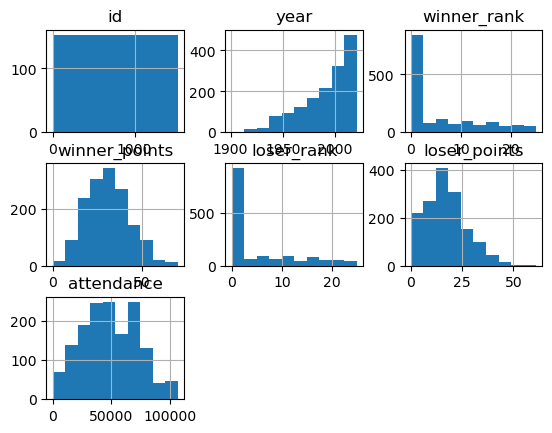

In [59]:
# let's see the histogram for each column
betterBowlData.hist()

Those graphs are smooshed up against each other. Let's space them out some.

array([[<Axes: title={'center': 'id'}>, <Axes: title={'center': 'year'}>,
        <Axes: title={'center': 'winner_rank'}>],
       [<Axes: title={'center': 'winner_points'}>,
        <Axes: title={'center': 'loser_rank'}>,
        <Axes: title={'center': 'loser_points'}>],
       [<Axes: title={'center': 'attendance'}>, <Axes: >, <Axes: >]],
      dtype=object)

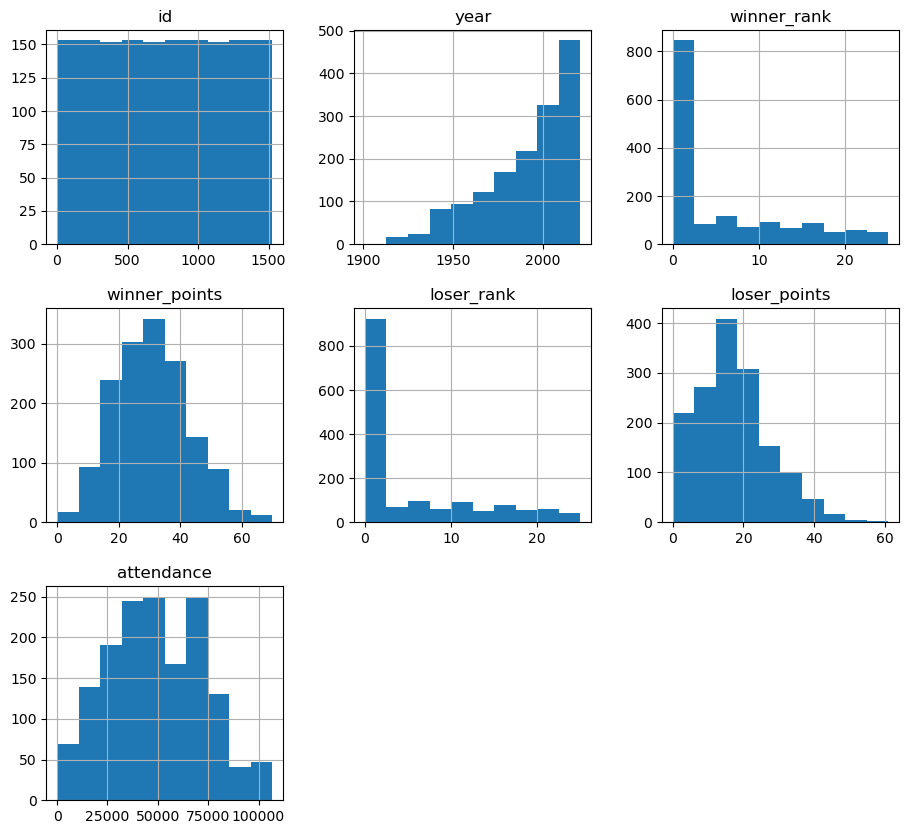

In [61]:
# use figsize to specify figure size in inches
betterBowlData.hist(figsize=(11, 10))

<Axes: xlabel='year', ylabel='winner_points'>

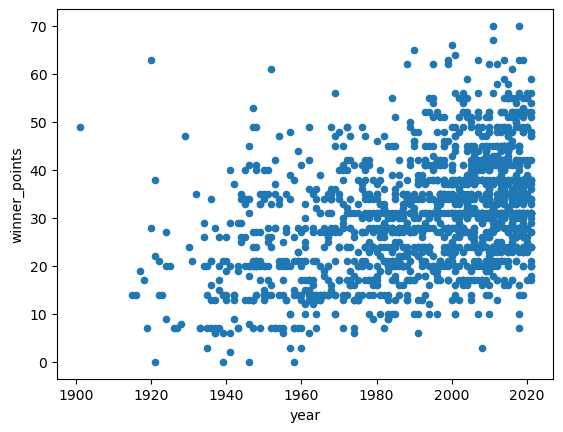

In [63]:
# How about a scatter plot of winner points vs years 

betterBowlData.plot.scatter(x='year',y='winner_points')

The [documentation](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html) for the pandas `.plot()` method shows that you can do scatter plots, area charts, bar charts, etc.

<br>

-----
## Learning More About Pandas   

There is a great [pandas "cheat sheet"](https://pandas.pydata.org/Pandas_Cheat_Sheet.pdf) available from the pandas organization (it is also available in this Canvas Module). We will be learning more about Pandas in the coming weeks. If you have free time, the following Pandas tutorials are interesting:
* https://www.w3schools.com/python/pandas/default.asp (I recommend the [W3](https://www.w3schools.com/) tutorials for any topic: Python, SQL, HTML, CSS, ...)
* https://pandas.pydata.org/docs/getting_started/intro_tutorials/index.html
* https://wavedatalab.github.io/datawithpython/index.html
